In [1]:
import pandas as pd
import os.path
from glob import glob

In [2]:
by_city_output_folder = 'data/bycity'

In [3]:
glob(os.path.join(by_city_output_folder, '874*.csv'))

['data/bycity/87405.csv',
 'data/bycity/87412.csv',
 'data/bycity/87416.csv',
 'data/bycity/87418.csv',
 'data/bycity/87436.csv',
 'data/bycity/87444.csv',
 'data/bycity/87448.csv',
 'data/bycity/87453.csv',
 'data/bycity/87467.csv',
 'data/bycity/87470.csv',
 'data/bycity/87480.csv',
 'data/bycity/87497.csv']

In [10]:
df = pd.concat([pd.read_csv(x) for x in glob(os.path.join(by_city_output_folder, '*.csv'))]).reset_index(drop=True)

In [11]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-4.6,0.2,-5.9,0.0,2021-01-01
1,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-0.8,1.5,-6.6,3.9,2021-01-02
2,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.6,4.4,0.4,0.0,2021-01-03
3,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.9,3.3,0.9,0.2,2021-01-04
4,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-1.7,-0.3,-4.9,0.0,2021-01-05
...,...,...,...,...,...,...,...,...,...,...
2006572,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.6,31.1,22.8,0.0,2021-12-24
2006573,98851,ヘネラルサントス,フィリピン,6.05,125.10,27.7,32.4,22.6,12.0,2021-12-25
2006574,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.8,31.7,23.0,0.0,2021-12-26
2006575,98851,ヘネラルサントス,フィリピン,6.05,125.10,24.9,27.9,21.4,0.0,2021-12-28


In [16]:
df['month'] = df['date'].apply(lambda x: int(x[5:7]))

In [17]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date,month
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-4.6,0.2,-5.9,0.0,2021-01-01,1
1,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-0.8,1.5,-6.6,3.9,2021-01-02,1
2,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.6,4.4,0.4,0.0,2021-01-03,1
3,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.9,3.3,0.9,0.2,2021-01-04,1
4,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-1.7,-0.3,-4.9,0.0,2021-01-05,1
...,...,...,...,...,...,...,...,...,...,...,...
2006572,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.6,31.1,22.8,0.0,2021-12-24,12
2006573,98851,ヘネラルサントス,フィリピン,6.05,125.10,27.7,32.4,22.6,12.0,2021-12-25,12
2006574,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.8,31.7,23.0,0.0,2021-12-26,12
2006575,98851,ヘネラルサントス,フィリピン,6.05,125.10,24.9,27.9,21.4,0.0,2021-12-28,12


In [21]:
df_mean = df.groupby(['country_name', 'month']).mean()[['mean', 'max', 'min']]
df_std = df.groupby(['country_name', 'month']).std()[['mean', 'max', 'min']]
df_std.columns = ['mean_sd', 'max_sd', 'min_sd']
df_mean_sd = pd.merge(df_mean, df_std, left_index=True, right_index=True)

In [23]:
from itertools import chain
df_mean_sd = df_mean_sd[list(chain(*zip(df_mean.columns, df_std.columns)))]

In [24]:
df_mean_sd

mean   mean_sd        max    max_sd        min  \
country_name     month                                                        
DETACHED ISLANDS 1      27.579661  0.856975  30.810169  1.041500  24.967797   
                 2      26.525893  0.939874  29.823214  1.284734  24.202679   
                 3      27.266129  0.893683  31.209677  0.575371  24.750000   
                 4      27.058333  0.835097  30.796667  0.648849  24.563333   
                 5      27.148387  0.930140  30.482258  0.713459  24.950000   
...                           ...       ...        ...       ...        ...   
赤道ギニア            8      26.230435  0.561196  29.278261  0.882124  23.330435   
                 9      26.322727  0.418537  29.422727  0.761535  23.772727   
                 10     26.591667  0.703832  30.016667  0.643617  23.833333   
                 11     26.860000  0.708891  30.300000  0.870572  23.780000   
                 12     27.739286  0.772844  31.553571  0.892554  24.421429   

                          min_sd  
country_name     month            
DETACHED ISLANDS 1      1.276369  
                 2      0.992995  
                 3      0.988085  
                 4      0.952422  
                 5      0.950194  
...                          ...  
赤道ギニア            8      0.955099  
                 9      0.719247  
                 10     0.798104  
                 11     1.002418  
                 12     1.059475  

[2292 rows x 6 columns]

In [25]:
df_mean_sd.to_csv('data/month_mean.csv', index=True)

# Visualize

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

<AxesSubplot:ylabel='country_name-month'>

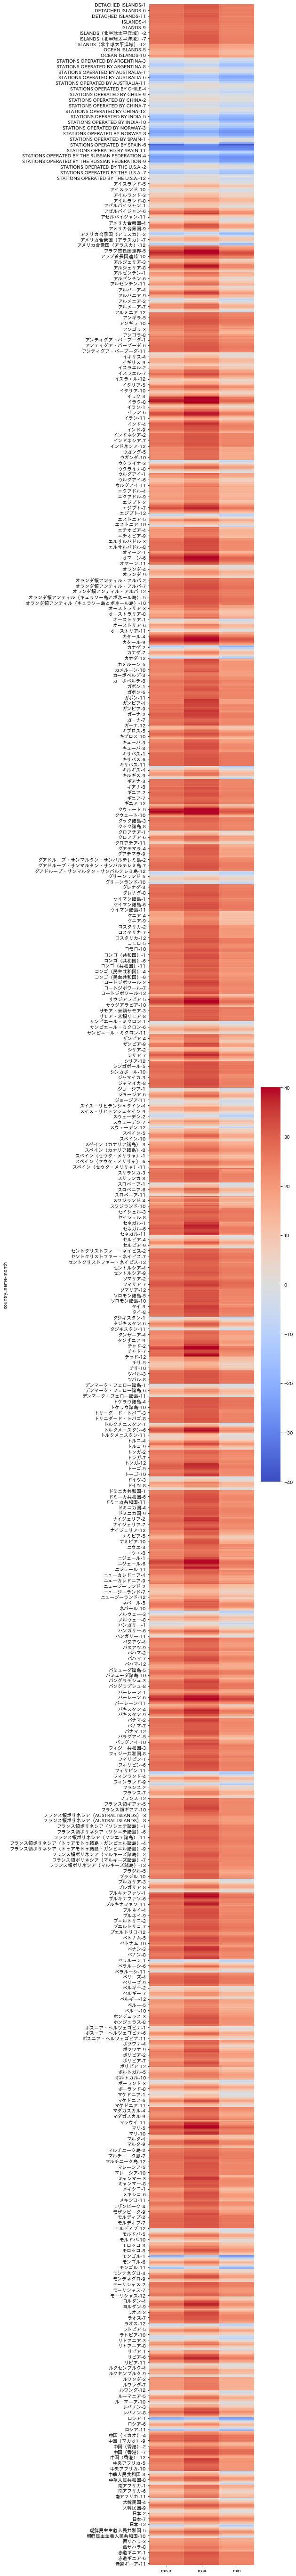

In [38]:
plt.figure(figsize=(5, 100)) 
sns.heatmap(df_mean, cmap='coolwarm', vmin=-40, vmax=40)